# <center> Ajuste de Hiperparâmetros </center>

<br/>

<div style="text-align: center;font-size: 90%;">
    Bruno Dias dos Santos<sup><a href="https://orcid.org/0000-0001-6181-2158"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><sup><a href="https://orcid.org/0000-0002-0082-9498"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Programa de Pós-Graduação em Computação Aplicada, Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brasil
    <br/><br/>
    Contato: <div><a href="mailto:bruno.santos@inpe.br">bruno.santos@inpe.br</a></div>
    <br/><br/>
    Última atualização: 29 de Abril de 2022
</div>
<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Resumo.</b> Este Notebook apresenta uma metodologia para selecionar hiperparâmetros do algoritmo de classificação <i>Random Forest</i>. Dado uma tabela de atributos (.csv) contendo uma variável com as classes amostrais,  será testado o melhor modelo possível gerado pelo <i>Random Forest </i>, dado um conjunto de hiperparametros. Os hiperparâmetros são escolhidos utilizando a técnica <i>GridSearchCV</i>, adotando um <i>K-Fold</i> com 5 grupos e medindo o desempenho de cada combinação com o <i> F1-Score </i>.     
</div>    

<br/>


Chamando as Bibliotecas:

In [67]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
import seaborn as sns


Carregando a base de dados já tratada anteriormente:

In [2]:
obj =  pd.read_csv("C:\\Users\\dias-bruno\\Desktop\\INPE-SER\\4PERIODO\\AI\\DADOS_ATV1\\dados_tratados_selecionados.csv", index_col=0)

In [3]:
obj

,20201008_S2_B11_mean,20201008_S2_B12_max,20200531_S2_B12_mean,20201008_S2_B5_majority,20201008_S2_B10_median,20201008_S2_B5_minority,20200531_S2_B4_mean,20201008_S2_B4_min,20201007_S1_VH_mean,20200531_S2_B12_majority,...,20201007_S1_VH_max,20200531_S2_B1_min,20200531_S2_B11_max,20200531_S2_B1_max,20201007_S1_VV_majority,S1_20200528_VHmean,S1_20200528_VV_mean,20201007_S1_VV_stdev,fid,DN
0,0.419469,0.423236,0.247904,0.226024,0.40,0.275920,0.105412,0.146552,0.394988,0.196212,...,0.369723,0.268371,0.380654,0.281481,0.197917,0.393686,0.421034,0.188101,1250,3
1,0.296152,0.201192,0.139092,0.252944,0.25,0.279264,0.035455,0.129310,0.334186,0.121904,...,0.301426,0.172524,0.267042,0.125926,0.111943,0.326893,0.230921,0.110371,1251,33
2,0.423887,0.308203,0.274843,0.358946,0.40,0.399666,0.136741,0.198276,0.424347,0.277319,...,0.323103,0.316294,0.403376,0.229630,0.194163,0.358458,0.281174,0.107923,1274,3
3,0.530454,0.519248,0.330135,0.347168,0.65,0.396321,0.292352,0.275862,0.223831,0.288975,...,0.176187,0.591054,0.473707,0.444444,0.195322,0.365473,0.282117,0.069787,1282,4
4,0.137580,0.062328,0.126111,0.188446,0.05,0.238573,0.050830,0.137931,0.470425,0.126275,...,0.173302,0.287540,0.203636,0.200000,0.388160,0.393190,0.249103,0.041181,1283,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90005,0.238217,0.654445,0.187919,0.284352,0.20,0.266444,0.089542,0.146552,0.579480,0.206411,...,0.245864,0.233227,0.574118,0.365432,0.845466,0.549968,0.461547,0.218372,98176,3
90006,0.818185,0.670715,0.276151,0.831744,0.90,0.387960,0.183673,0.275862,0.099226,0.313259,...,0.414178,0.418530,0.595542,0.466667,0.043809,0.588103,0.661593,0.050271,98177,39
90007,0.855023,0.754125,0.604766,0.896242,0.90,0.445931,0.471311,0.232759,0.087814,0.677028,...,0.436211,0.431310,0.633629,0.417284,0.045781,0.264713,0.291962,0.043450,98196,39
90008,0.248475,0.722273,0.204276,0.268087,0.20,0.113155,0.098964,0.103448,0.548512,0.219038,...,0.245864,0.329073,0.858256,0.797531,0.508005,0.524900,0.410112,0.198525,98213,3


Visualizando estatísticas descritivas da base de dados já tratada:

In [ ]:
obj.describe()

Definicação da variável identificadora de cada feição e da variável com as classes amostrais:

In [5]:
indice = 'fid'
TARGET = 'DN'

Separandos os dados de treinamento e teste:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(obj.iloc[:,:-2], obj[TARGET], test_size = 0.3, stratify=obj[TARGET], random_state=42)

In [7]:
x_train.shape

(63007, 39)

In [8]:
x_test.shape

(27003, 39)

Visualizando as classes amostrais:

In [81]:
obj[TARGET].unique()

array([ 3, 33,  4, 12, 15, 41, 39, 11, 24], dtype=int64)

In [82]:
obj.groupby(TARGET)[indice].nunique()

DN
3     10027
4      2017
11      608
12     4892
15    42470
24       25
33     1681
39     2838
41    25452
Name: fid, dtype: int64

Seleção os hiperparametros e dos valores a serem testados no método GridSearchCV:

In [12]:
parametros = {'n_estimators':[1,50,100,500],
              'criterion':['gini','entropy'],
              'max_depth':[5,10,20, None]}

Definindo o GridSearchCV:

In [13]:
modelo = GridSearchCV(estimator = RandomForestClassifier(), verbose=2, param_grid = parametros, scoring='f1_macro', n_jobs=-1, cv=5)

Gerando o modelo de classificação Random Forest:

In [14]:
modelo.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 167.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'n_estimators': [1, 50, 100, 500]},
             scoring='f1_macro', verbose=2)

Visualizando a melhor combinação de hiperparâmetros:

In [17]:
modelo.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}

Melhor combinação de parâmetros: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}

In [22]:
modelo

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'n_estimators': [1, 50, 100, 500]},
             scoring='f1_macro', verbose=2)

Criando uma cópia com o melhor modelo para extrair métricas de desempenho:

In [51]:
melhor_modelo = RandomForestClassifier(criterion = 'entropy', max_depth = None, n_estimators = 50)
melhor_modelo.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

Utilizando o modelo treinado para prever a base de dados de teste:

In [52]:
y_pred = melhor_modelo.predict(x_test)

Visualizando as variáveis mais utilizadas no modelo Random Forest:

<Figure size 720x720 with 0 Axes>

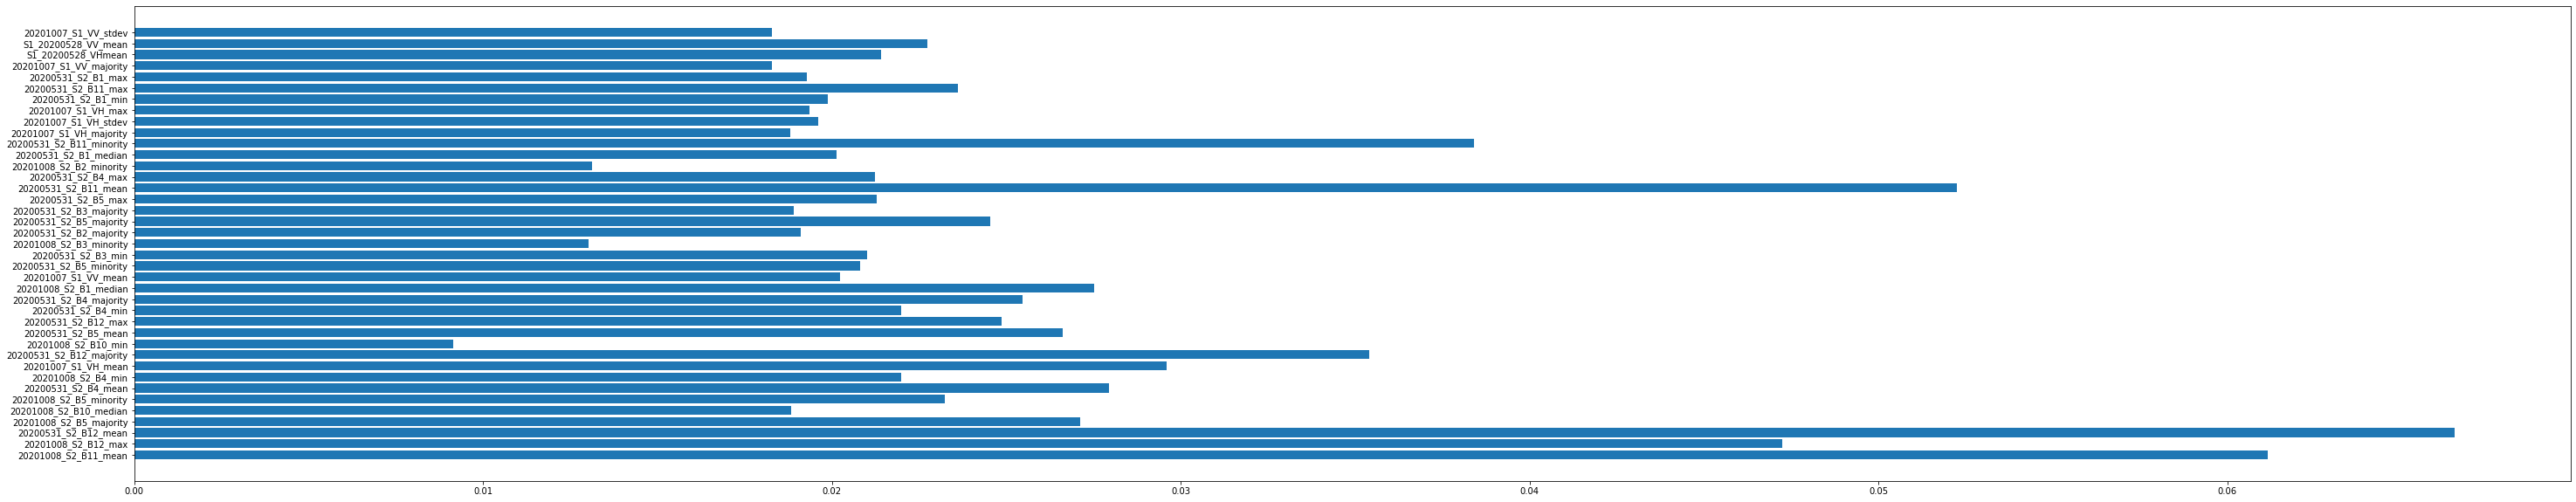

<Figure size 720x720 with 0 Axes>

In [69]:
plt.barh(x_test.columns, melhor_modelo.feature_importances_)

Visualizando métricas de desempenho do modelo de classificação na base de teste:

In [64]:
macro = f1_score(y_test, y_pred, average = 'macro')
wei = f1_score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)

results = {'F1_Score_Macro': macro,
             'F1_Score_Weighted': wei,
             'Global Acuraccy': accuracy 
            }

pd.DataFrame.from_dict(results, orient='index', dtype=None, columns=['Métricas'])

,Métricas
F1_Score_Macro,0.370682
F1_Score_Weighted,0.632652
Global Acuraccy,0.657557


Matriz de confusão aplicado sobre a base de teste:

In [65]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1050    13     0   110  1745     0    44     1    45]
 [   69   101     5    43   359     0    17     0    11]
 [   31    11     7    20    85     0    19     0     9]
 [  122    31     6   344   760     0    58     1   146]
 [  323    20     0    72 10309     0    48    21  1948]
 [    0     0     0     0     2     0     0     0     6]
 [   27     5     3    50   109     0   285     0    25]
 [    1     0     0     0   115     0     0   117   618]
 [   15     1     0     3  2038     0     8    28  5543]]
              precision    recall  f1-score   support

           3       0.64      0.35      0.45      3008
           4       0.55      0.17      0.26       605
          11       0.33      0.04      0.07       182
          12       0.54      0.23      0.33      1468
          15       0.66      0.81      0.73     12741
          24       0.00      0.00      0.00         8
          33       0.59      0.57      0.58       504
          39       0.70      0.14      0.23       851

C:\Users\dias-bruno\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


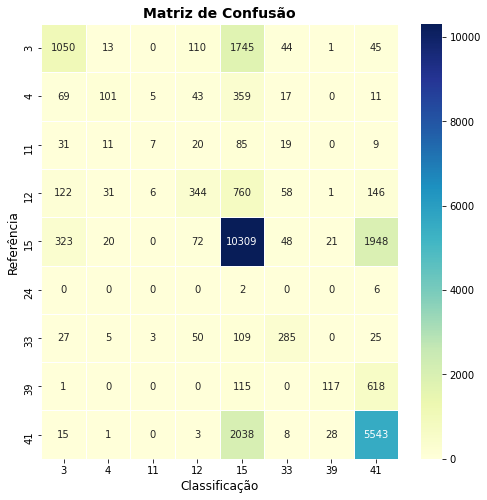

In [70]:
data = {'Reference': y_test, 'Predicted': y_pred}
df= pd.DataFrame(data, columns = ['Reference','Predicted'])
mc = pd.crosstab(df['Reference'], df['Predicted'], rownames=['Reference'], colnames=['Predicted'])

plt.figure(figsize=(8,8))
sns.heatmap(mc, annot=True,fmt='g',  cmap = 'YlGnBu',linewidths=.5)
plt.title('Matriz de Confusão', fontweight='bold', fontsize=14)
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Referência',fontsize=12)
plt.show()

Inserindo a classificação no csv da base de dados:

In [83]:
obj['CLASSIFICACAO'] = melhor_modelo.predict(obj.iloc[:,:-2])

Salvando o CSV com a classificação final:

In [84]:
obj.to_csv("C:\\Users\\dias-bruno\\Desktop\\INPE-SER\\4PERIODO\\AI\\classificacao.csv")